The goal of this TP is to create random number denerators, and evaluate their radomness quality.

In [46]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import time

#import algorithmK.py as alK

The first one we will implement is the K-algorithm seen in the TP session

In [47]:
### k algorithm

def k1(X):
    Y = int(X / (10 ** 9))
    return int(Y + 1)

def k2(X):
    Z = math.floor(X / (10 ** 8)) % 10
    return int(3 + Z)

def k3(X):
    if X < 5 * 10**9:
        X = X + 5 * 10**9
    return int(X)

def k4(X):
    X = int((X ** 2) / (10 ** 5)) % (10 ** 10)
    return int(X)

def k5(X):
    X = (1001001001 * X) % (10 ** 10)
    return int(X)

def k6(X):
    if X < 100000000:
        X = X + 9814055677
    else:
        X = (10 ** 10) - X
    return int(X)

def k7(X):
    X = (10**5)*(X % (10**5))+ int(X/(10**5))
    return int(X)

def k8(X):
    return k5(X)

def k9(X):
    X = list(str(X))
    for i in range(len(X)):
        if X[i] != "0":
            v = str(int(X[i])-1)
            X[i] = v
    return int(''.join(X))

def k10(X):
    if X < (10**5):
        X = X**2 + 99999
    else:
        X = X - 99999
    return int(X)

def k11(X):
    for i in range(2):
        if X < 10**9:
            X = 10 * X
    return int(X)

def k12(X):
    X = int(X*X-1/(10**5)) % (10**10)
    return int(X)

def main(X):
    Y = k1(X)
    for i in range(Y):
        j = 2
        while j < 13:
            if j == 2:
                Z = k2(X)
                j = Z + 3
            elif j == 3:
                X = k3(X)
                j = j + 1
            elif j == 4:
                X = k4(X)
                j = j + 1
            elif j == 5:
                X = k5(X)
                j = j + 1
            elif j == 6:
                X = k6(X)
                j = j + 1
            elif j == 7:
                X = k7(X)
                j = j + 1
            elif j == 8:
                X = k8(X)
                j = j + 1
            elif j == 9:
                X = k9(X)
                j = j + 1
            elif j == 10:
                X = k10(X)
                j = j + 1
            elif j == 11:
                X = k11(X)
                j = j + 1
            elif j == 12:
                X = k12(X)
                j = 13
    return X

The second one is any linear congruential generator

A linear congruential generator is a iterative function of type: $X_i =(a×X_{i−1}+c)\ mod\ m$

$X_0$ is called the seed value

In this case the variables will be set to the follwing values:
$\newline$
a = 1664525,
m = $2^{32}$,
c = 1013904223


In [48]:
### linear congruentil generator

def LCG(x, a, c, m):
    x = x % m
    for i in range(1000):
        x = (a*x + c) % m
    return x, 1000


The third and final one is an algorithm made by me

In [49]:
### algorithm made by me

def it_algo(X):
    return X % 90
    
def algo(X):
    it = it_algo(X)
    i = 0
    m = 10**10
    while i < it:
        X = int(X*X-1/(10**5)) % (10**10)
        X = abs(X**2 - X**3)
        X = abs(X - i)
        X = X % m
        i = i + 1
    return X
    

In [50]:
### compute 100 random numbers using random library from py to use as seed values

seeds = []

with open("random250.txt") as f:
    lines = f.readlines()
    for i in range(len(lines)):
        seeds.append(int(lines[i][:-1]))



In [63]:
### use seed values to compute 1000 random vaues using all three algorithms

randomValues1 = []
randomValues2 = []
randomValues2Period = []
randomValues3 = []
randomValues1Time = []
randomValues2Time = []
randomValues3Time = []
for i in range(len(seeds)):
    
    # generate random values with k algo and timing it 
    preRandom1C = time.time()
    randomValues1.append(main(seeds[i]))
    postRandom1C = time.time()
    randomValues1Time.append(postRandom1C-preRandom1C)
    
    # generate random values with 2nd algo and timing it 
    preRandom2C = time.time()
    randomVal2 = LCG(seeds[i], 1664525, 1013904223, 2**32)
    postRandom2C = time.time()
    randomValues2Time.append(postRandom2C-preRandom2C)
    randomValues2.append(randomVal2[0])
    randomValues2Period.append(randomVal2[1])
    
    # generate random values with my algo and timing it 
    preRandom3C = time.time()
    randomValues3.append(algo(seeds[i]))
    postRandom3C = time.time()
    randomValues3Time.append(postRandom3C-preRandom3C)



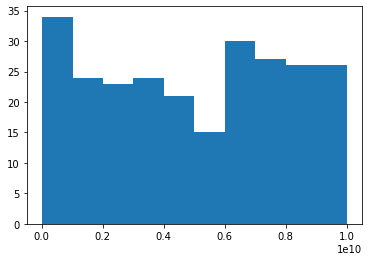

In [64]:
plt.hist(randomValues1, bins=10)
plt.show()

It was very difficult to create an actual graph that plotted a point for each seed and its corresponding random value, since the range of seeds is too large.<br>
min(seeds) = 545, max(seeds) = 65415.<br>
The same can be said for the random values generated by the seeds.<br>
min(random) = 10674176, max(random) = 9991737344$\newline$

My solution was to compute np.unique() of the random values generated, this way we can see how many overlaps/colisions were found

In [65]:
print("There were 250 seeds")
print("Number of values generated : ",len(randomValues1))
print("Number of unique values generated : ",len(np.unique(randomValues1)))

There were 250 seeds
Number of values generated :  250
Number of unique values generated :  248


As we can see, there were 2 repeated generated values. That is a 0.008% collision rate for our seed values.

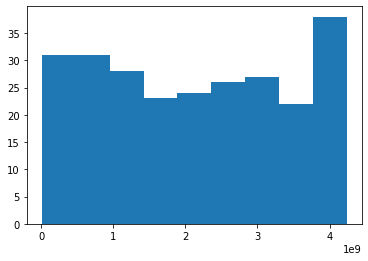

In [66]:
plt.hist(randomValues2, bins='auto')
plt.show()

The same problem as before was verified, the seed values have the same range as before, however the generated values range from:<br>
min(random) = 14222108, max(random) = 4235818127.$\newline$

My solution was again to compute np.unique() of the random values generated, this way we can see how many overlaps/colisions were found

In [67]:
print("There were 250 seeds")
print("Number of values generated : ",len(randomValues2))
print("Number of unique values generated : ",len(np.unique(randomValues2)))

There were 250 seeds
Number of values generated :  250
Number of unique values generated :  248


As we can see, there were 2 repeated generated values. That is a 0.008% collision rate for our seed values.

I admit I am very surpised we got collisions with only 250 seed values, since my value m is very large.$\newline$
We have to also consider the period of the computations, however because m values is so large, even with 10000 iterations, there were nevery any periods found for non of the seed values.

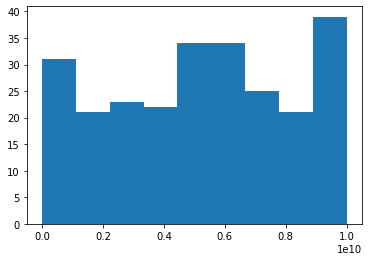

In [68]:
plt.hist(randomValues3, bins='auto')
plt.show()

In [69]:
print("There were 250 seeds")
print("Number of values generated : ",len(randomValues3))
print("Number of unique values generated : ",len(np.unique(randomValues3)))

There were 250 seeds
Number of values generated :  250
Number of unique values generated :  213


Finally we must consider the time spent by each function to generate a random value:

In [70]:
avg1 = 0
avg2 = 0
avg3 = 0
for i in range(len(randomValues1Time)):
    avg1 = avg1 + randomValues1Time[i]
    avg2 = avg2 + randomValues2Time[i]
    avg3 = avg3 + randomValues3Time[i]

avg1 = avg1/250
avg2 = avg2/250
avg3 = avg3/250

print("avg computation time for algo 1: ", avg1)
print("avg computation time for algo 2: ", avg2)
print("avg computation time for algo 3: ", avg3)

avg computation time for algo 1:  2.3800849914550782e-05
avg computation time for algo 2:  0.00021628379821777343
avg computation time for algo 3:  5.7511329650878906e-05
